## 1. Bitcoin and Cryptocurrencies: Full dataset, filtering, and reproducibility
<p>Since the <a href="https://newfronttest.bitcoin.com/bitcoin.pdf">launch of Bitcoin in 2008</a>, hundreds of similar projects based on the blockchain technology have emerged. We call these cryptocurrencies (also coins or cryptos in the Internet slang). Some are extremely valuable nowadays, and others may have the potential to become extremely valuable in the future<sup>1</sup>. In fact, on the 6th of December of 2017, Bitcoin has a <a href="https://en.wikipedia.org/wiki/Market_capitalization">market capitalization</a> above $200 billion. </p>
<p><center>
<img src="https://assets.datacamp.com/production/project_82/img/bitcoint_market_cap_2017.png" style="width:500px"> <br> 
<em>The astonishing increase of Bitcoin market capitalization in 2017.</em></center></p>
<p>*<sup>1</sup> <strong>WARNING</strong>: The cryptocurrency market is exceptionally volatile<sup>2</sup> and any money you put in might disappear into thin air.  Cryptocurrencies mentioned here <strong>might be scams</strong> similar to <a href="https://en.wikipedia.org/wiki/Ponzi_scheme">Ponzi Schemes</a> or have many other issues (overvaluation, technical, etc.). <strong>Please do not mistake this for investment advice</strong>. *</p>
<p><em><sup>2</sup> <strong>Update on March 2020</strong>: Well, it turned out to be volatile indeed :D</em></p>
<p>That said, let's get to business. We will start with a CSV we conveniently downloaded on the 6th of December of 2017 using the coinmarketcap API (NOTE: The public API went private in 2020 and is no longer available) named <code>datasets/coinmarketcap_06122017.csv</code>. </p>

In [2]:
# Importing pandas
import pandas as pd

# Importing matplotlib and setting aesthetics for plotting later.
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg' 
plt.style.use('fivethirtyeight')
#fivethirtyeight
# Reading datasets/coinmarketcap_06122017.csv into pandas
dec6 = pd.read_csv('coinmarketcap_06122017.csv')

# Selecting the 'id' and the 'market_cap_usd' columns
market_cap_raw = dec6[['id','market_cap_usd']]

# Counting the number of values
print(market_cap_raw.count())

id                1326
market_cap_usd    1031
dtype: int64


In [3]:
dec6.head()

,Unnamed: 0,24h_volume_usd,available_supply,id,last_updated,market_cap_usd,max_supply,name,percent_change_1h,percent_change_24h,percent_change_7d,price_btc,price_usd,rank,symbol,total_supply
0,0,9.007640e+09,1.672352e+07,bitcoin,1512549554,2.130493e+11,2.100000e+07,Bitcoin,0.12,7.33,17.45,1.000000,12739.500000,1,BTC,1.672352e+07
1,1,1.551330e+09,9.616537e+07,ethereum,1512549553,4.352945e+10,NaN,Ethereum,-0.18,-3.93,-7.33,0.036177,452.652000,2,ETH,9.616537e+07
2,2,1.111350e+09,1.684044e+07,bitcoin-cash,1512549578,2.529585e+10,2.100000e+07,Bitcoin Cash,1.65,-5.51,-4.75,0.120050,1502.090000,3,BCH,1.684044e+07
3,3,2.936090e+09,2.779530e+09,iota,1512549571,1.475225e+10,2.779530e+09,IOTA,-2.38,83.35,255.82,0.000424,5.307460,4,MIOTA,2.779530e+09
4,4,2.315050e+08,3.873915e+10,ripple,1512549541,9.365343e+09,1.000000e+11,Ripple,0.56,-3.70,-14.79,0.000019,0.241754,5,XRP,9.999309e+10


## 2. Discard the cryptocurrencies without a market capitalization
<p>Why do the <code>count()</code> for <code>id</code> and <code>market_cap_usd</code> differ above? It is because some cryptocurrencies listed in coinmarketcap.com have no known market capitalization, this is represented by <code>NaN</code> in the data, and <code>NaN</code>s are not counted by <code>count()</code>. These cryptocurrencies are of little interest to us in this analysis, so they are safe to remove.</p>

In [4]:
# Filtering out rows without a market capitalization
cap = market_cap_raw[market_cap_raw['market_cap_usd']>0]

# Counting the number of values again
print(cap.count())

id                1031
market_cap_usd    1031
dtype: int64


## 3. How big is Bitcoin compared with the rest of the cryptocurrencies?
<p>At the time of writing, Bitcoin is under serious competition from other projects, but it is still dominant in market capitalization. Let's plot the market capitalization for the top 10 coins as a barplot to better visualize this.</p>

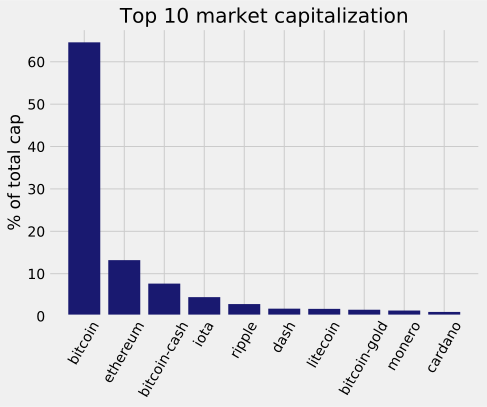

In [5]:
#Declaring these now for later use in the plots
TOP_CAP_TITLE = 'Top 10 market capitalization'
TOP_CAP_YLABEL = '% of total cap'

# Selecting the first 10 rows and setting the index
cap10 = cap[0:10]
cap10.set_index(cap10['id'])

# Calculating market_cap_perc
cap10=cap10.assign(market_cap_perc= lambda x: (x.market_cap_usd/x.market_cap_usd.sum())*100)

# Plotting the barplot with the title defined above 
import numpy as np
import matplotlib.colors as mcolors

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = cap10['id']
y = cap10['market_cap_perc']
ax.bar(x,y,color='midnightblue')
plt.xticks(rotation=60)
plt.title(TOP_CAP_TITLE)
plt.ylabel(TOP_CAP_YLABEL)
plt.show()

## 4. Making the plot easier to read and more informative
<p>While the plot above is informative enough, it can be improved. Bitcoin is too big, and the other coins are hard to distinguish because of this. Instead of the percentage, let's use a log<sup>10</sup> scale of the "raw" capitalization. Plus, let's use color to group similar coins and make the plot more informative<sup>1</sup>. </p>
<p>For the colors rationale: bitcoin-cash and bitcoin-gold are forks of the bitcoin <a href="https://en.wikipedia.org/wiki/Blockchain">blockchain</a><sup>2</sup>. Ethereum and Cardano both offer Turing Complete <a href="https://en.wikipedia.org/wiki/Smart_contract">smart contracts</a>. Iota and Ripple are not minable. Dash, Litecoin, and Monero get their own color.</p>
<p><sup>1</sup> <em>This coloring is a simplification. There are more differences and similarities that are not being represented here.</em></p>
<p><sup>2</sup> <em>The bitcoin forks are actually <strong>very</strong> different, but it is out of scope to talk about them here. Please see the warning above and do your own research.</em></p>

Text(0, 0.5, 'USD')

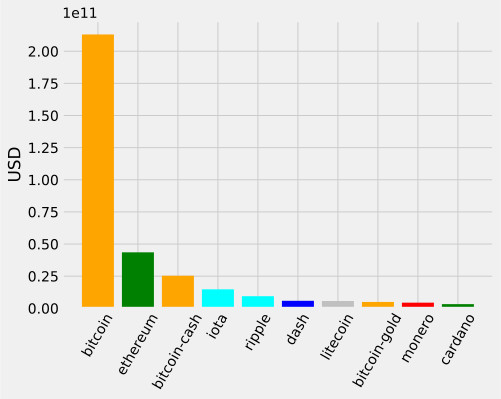

In [6]:
# Colors for the bar plot
COLORS = ['orange', 'green', 'orange', 'cyan', 'cyan', 'blue', 'silver', 'orange', 'red', 'green']

# Plotting market_cap_usd as before but adding the colors and scaling the y-axis  
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = cap10['id']
y = cap10['market_cap_usd']
ax.bar(x,y,color=COLORS)
plt.xticks(rotation=60)
# Annotating the y axis with 'USD'
plt.ylabel('USD')

## 5. What is going on?! Volatility in cryptocurrencies
<p>The cryptocurrencies market has been spectacularly volatile since the first exchange opened. This notebook didn't start with a big, bold warning for nothing. Let's explore this volatility a bit more! We will begin by selecting and plotting the 24 hours and 7 days percentage change, which we already have available.</p>

In [7]:
# Selecting the id, percent_change_24h and percent_change_7d columns
volatility = dec6[['id','percent_change_24h','percent_change_7d']]

# Setting the index to 'id' and dropping all NaN rows
volatility.dropna(inplace=True)
volatility.set_index(volatility['id'],inplace=True)

# Sorting the DataFrame by percent_change_24h in ascending order
volatility = volatility.sort_values(by=['percent_change_24h'])

# Checking the first few rows
volatility.head()

D:\vinod\Arcade\New folder\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,id,percent_change_24h,percent_change_7d
id,,,
flappycoin,flappycoin,-95.85,-96.61
credence-coin,credence-coin,-94.22,-95.31
coupecoin,coupecoin,-93.93,-61.24
tyrocoin,tyrocoin,-79.02,-87.43
petrodollar,petrodollar,-76.55,542.96


## 6. Well, we can already see that things are *a bit* crazy
<p>It seems you can lose a lot of money quickly on cryptocurrencies. Let's plot the top 10 biggest gainers and top 10 losers in market capitalization.</p>

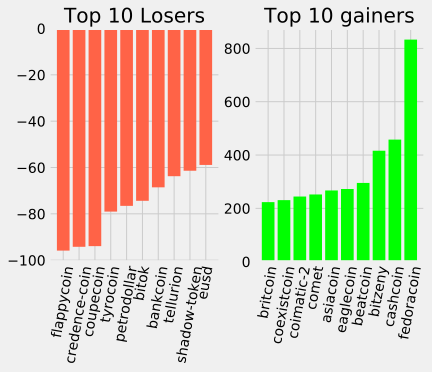

In [8]:
#Defining a function with 2 parameters, the series to plot and the title

plt.subplot(1,2,1)
plt.bar(volatility['id'].head(10),volatility['percent_change_24h'].head(10),color='tomato')
plt.xticks(rotation=800)
plt.title('Top 10 Losers')
plt.subplot(1,2,2)
plt.bar(volatility['id'].tail(10),volatility['percent_change_24h'].tail(10),color='lime')
plt.xticks(rotation=80)
plt.title('Top 10 gainers')
DTITLE = "24 hours top losers and winners"

# Calling the function above with the 24 hours period series and title DTITLE  


## 7. Ok, those are... interesting. Let's check the weekly Series too.
<p>800% daily increase?! Why are we doing this tutorial and not buying random coins?<sup>1</sup></p>
<p>After calming down, let's reuse the function defined above to see what is going weekly instead of daily.</p>
<p><em><sup>1</sup> Please take a moment to understand the implications of the red plots on how much value some cryptocurrencies lose in such short periods of time</em></p>

Text(0.5, 1.0, 'Weekly top losers and winners')

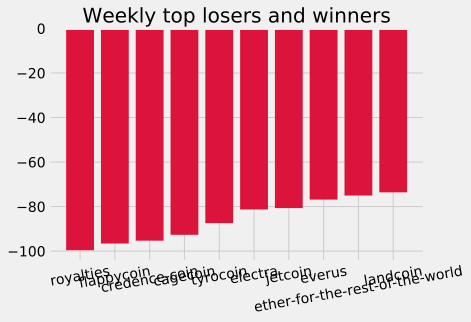

In [9]:
# Sorting in ascending order
volatility7d = volatility.sort_values(by=['percent_change_7d'])

WTITLE = "Weekly top losers and winners"

# Calling the top10_subplot function
plt.bar(volatility7d['id'].head(10),volatility7d['percent_change_7d'].head(10),color='crimson')
plt.xticks(rotation=10)
plt.title(WTITLE)

## 8. How small is small?
<p>The names of the cryptocurrencies above are quite unknown, and there is a considerable fluctuation between the 1 and 7 days percentage changes. As with stocks, and many other financial products, the smaller the capitalization, the bigger the risk and reward. Smaller cryptocurrencies are less stable projects in general, and therefore even riskier investments than the bigger ones<sup>1</sup>. Let's classify our dataset based on Investopedia's capitalization <a href="https://www.investopedia.com/video/play/large-cap/">definitions</a> for company stocks. </p>
<p><sup>1</sup> <em>Cryptocurrencies are a new asset class, so they are not directly comparable to stocks. Furthermore, there are no limits set in stone for what a "small" or "large" stock is. Finally, some investors argue that bitcoin is similar to gold, this would make them more comparable to a <a href="https://www.investopedia.com/terms/c/commodity.asp">commodity</a> instead.</em></p>

In [10]:
# Selecting everything bigger than 10 billion 
largecaps = cap[cap['market_cap_usd']>10000000000] 
largecaps.head()
# Printing out largecaps

,id,market_cap_usd
0,bitcoin,2.130493e+11
1,ethereum,4.352945e+10
2,bitcoin-cash,2.529585e+10
3,iota,1.475225e+10


## 9. Most coins are tiny
<p>Note that many coins are not comparable to large companies in market cap, so let's divert from the original Investopedia definition by merging categories.</p>
<p><em>This is all for now. Thanks for completing this project!</em></p>

In [11]:
dec6=dec6[dec6['market_cap_usd']>0]
dec6.set_index(dec6['id'],inplace=True)
dec6.head()

,Unnamed: 0,24h_volume_usd,available_supply,id,last_updated,market_cap_usd,max_supply,name,percent_change_1h,percent_change_24h,percent_change_7d,price_btc,price_usd,rank,symbol,total_supply
id,,,,,,,,,,,,,,,,
bitcoin,0,9.007640e+09,1.672352e+07,bitcoin,1512549554,2.130493e+11,2.100000e+07,Bitcoin,0.12,7.33,17.45,1.000000,12739.500000,1,BTC,1.672352e+07
ethereum,1,1.551330e+09,9.616537e+07,ethereum,1512549553,4.352945e+10,NaN,Ethereum,-0.18,-3.93,-7.33,0.036177,452.652000,2,ETH,9.616537e+07
bitcoin-cash,2,1.111350e+09,1.684044e+07,bitcoin-cash,1512549578,2.529585e+10,2.100000e+07,Bitcoin Cash,1.65,-5.51,-4.75,0.120050,1502.090000,3,BCH,1.684044e+07
iota,3,2.936090e+09,2.779530e+09,iota,1512549571,1.475225e+10,2.779530e+09,IOTA,-2.38,83.35,255.82,0.000424,5.307460,4,MIOTA,2.779530e+09
ripple,4,2.315050e+08,3.873915e+10,ripple,1512549541,9.365343e+09,1.000000e+11,Ripple,0.56,-3.70,-14.79,0.000019,0.241754,5,XRP,9.999309e+10


In [12]:
len(dec6)

1031

In [13]:
x=[]
for i in dec6['id']:
    if dec6.loc[i]['market_cap_usd']>10000000000:
        x.append('Large cap')
    elif dec6.loc[i]['market_cap_usd']<10000000000 and dec6.loc[i]['market_cap_usd']>2000000000:
        x.append('Mid cap')
    elif dec6.loc[i]['market_cap_usd']>300000000 and dec6.loc[i]['market_cap_usd']<2000000000:
        x.append('Small cap')
    elif dec6.loc[i]['market_cap_usd']>50000000 and dec6.loc[i]['market_cap_usd']<300000000:
        x.append('Micro cap')
    elif dec6.loc[i]['market_cap_usd']<50000000:
        x.append('Nano cap')
    else:
        flag=0

In [14]:
dec6['type']=x

In [15]:
# Making a nice function for counting different marketcaps from the
# "cap" DataFrame. Returns an int.
# INSTRUCTORS NOTE: Since you made it to the end, consider it a gift :D
def capcount(query_string):
    
    cdf=dec6[dec6['type']==query_string]
            
    return len(cdf)


# Labels for the plot
LABELS = ["biggish", "micro", "nano"]

# Using capcount count the biggish cryptos
biggish = capcount('Large cap')

# Same as above for micro ...
micro = capcount('Micro cap')

# ... and for nano
nano =  capcount('Nano cap')

# Making a list with the 3 counts
values = [biggish,micro,nano]


In [16]:
values

[4, 96, 896]

<BarContainer object of 3 artists>

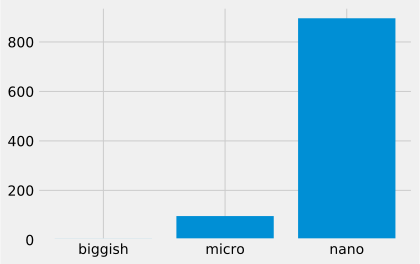

In [17]:
# Plotting them with matplotlib 

plt.bar(LABELS,values)